import packages

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

교촌, 비비큐 치킨에 대한 검색량

https://trends.google.com/trends/?geo=KR 통해 대한민국에서의 검색량을 조사

비비큐 치킨은 "bbq", "비비큐"의 검색량을 조사한 뒤 더함

In [106]:
df = pd.read_csv('multiTimeline.csv')

In [107]:
df

,일,bbq,비비큐,교촌
0,2022-10-27,45,8,7
1,2022-10-28,50,13,68
2,2022-10-29,53,0,35
3,2022-10-30,49,17,44
4,2022-10-31,32,8,11
5,2022-11-01,38,0,15
6,2022-11-02,32,0,34
7,2022-11-03,38,0,39
8,2022-11-04,54,24,36
9,2022-11-05,80,14,49


In [108]:
df['bbq'] += df['비비큐']
df.drop('비비큐', inplace=True, axis=1)
df.drop('일', inplace=True, axis=1)
df.rename(columns={'교촌': 'Kyochon'}, inplace=True)

df

,bbq,Kyochon
0,53,7
1,63,68
2,53,35
3,66,44
4,40,11
5,38,15
6,32,34
7,38,39
8,78,36
9,94,49


각각의 검색량 그래프

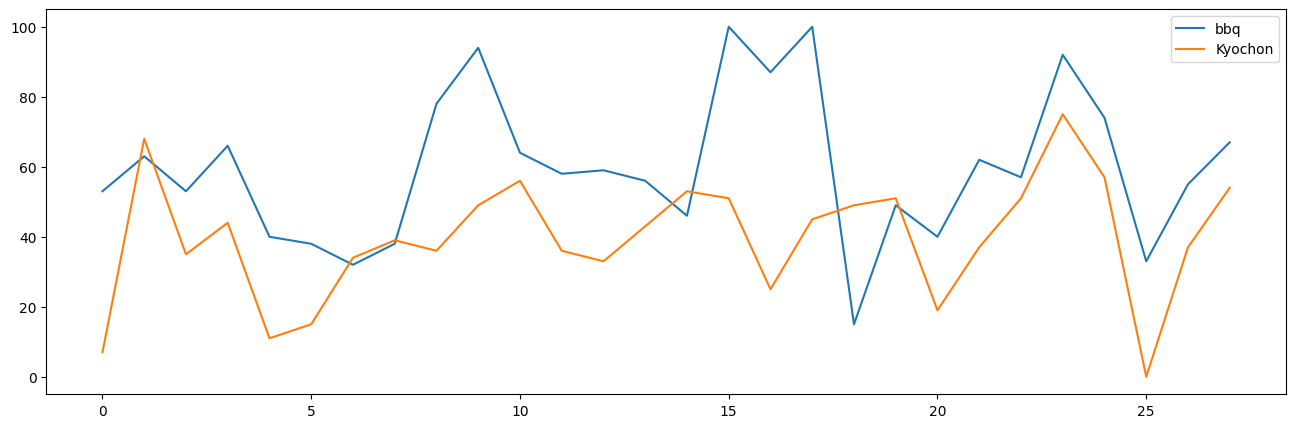

In [109]:
df.plot(figsize=(16, 5))
plt.show()

### 추세 분석
차수: DEG

의사역행렬을 이용하여 가장 가까운 해를 찾음

In [121]:
DEG = 13

In [122]:
a = np.matrix([
    [pow(i, j) for j in range(DEG+1)] for i in range(df['bbq'].size)
])

bbq = np.matrix(df['bbq']).transpose()
kyo = np.matrix(df['Kyochon']).transpose()

a.shape

(28, 14)

In [123]:
bbq

matrix([[ 53],
        [ 63],
        [ 53],
        [ 66],
        [ 40],
        [ 38],
        [ 32],
        [ 38],
        [ 78],
        [ 94],
        [ 64],
        [ 58],
        [ 59],
        [ 56],
        [ 46],
        [100],
        [ 87],
        [100],
        [ 15],
        [ 49],
        [ 40],
        [ 62],
        [ 57],
        [ 92],
        [ 74],
        [ 33],
        [ 55],
        [ 67]])

In [124]:
mp_inverse = np.linalg.pinv(a)
mp_inverse.shape

(14, 28)

In [125]:
mp_inverse.tolist()[0]

[1.5738987179896925e-14,
 3.4986761402142154e-12,
 1.1030475219357034e-10,
 7.247419462715297e-10,
 2.35492827856468e-09,
 5.0207137787585235e-09,
 7.902922991376733e-09,
 9.612730131148771e-09,
 8.945481359056786e-09,
 5.653916467054715e-09,
 7.663057319254625e-10,
 -3.77357222489619e-09,
 -6.0094523338861185e-09,
 -4.989254025110597e-09,
 -1.3663361803623762e-09,
 2.7954069973644395e-09,
 5.035931460486124e-09,
 3.915935419979333e-09,
 8.35846908943196e-11,
 -3.790840683072811e-09,
 -4.568508995241095e-09,
 -1.152399319153852e-09,
 3.6818186164385835e-09,
 4.467111349422655e-09,
 -1.2987485146518473e-09,
 -5.858417957631918e-09,
 4.415367250730936e-09,
 -9.212966115503707e-10]

In [126]:
bbq_coeff = np.matmul(mp_inverse, bbq)
kyo_coeff = np.matmul(mp_inverse, kyo)

bbq_coeff

matrix([[ 2.50274139e-06],
        [ 3.37934948e-06],
        [ 8.05341237e-05],
        [ 4.13754673e-04],
        [ 1.83317967e-03],
        [ 6.18608731e-03],
        [ 1.14837645e-02],
        [-4.78959710e-03],
        [ 7.83350759e-04],
        [-6.90001370e-05],
        [ 3.57239733e-06],
        [-1.09115227e-07],
        [ 1.82412012e-09],
        [-1.28929496e-11]])

In [127]:
bbq_poly = np.poly1d(bbq_coeff.transpose().tolist()[0][::-1])
kyo_poly = np.poly1d(kyo_coeff.transpose().tolist()[0][::-1])

print(bbq_poly)

            13             12             11             10           9
-1.289e-11 x  + 1.824e-09 x  - 1.091e-07 x  + 3.572e-06 x  - 6.9e-05 x
              8           7           6            5            4
 + 0.0007834 x - 0.00479 x + 0.01148 x + 0.006186 x + 0.001833 x
              3             2
 + 0.0004138 x + 8.053e-05 x + 3.379e-06 x + 2.503e-06


In [137]:
plot_x = np.linspace(0, 27, 150)

bbq_y = [bbq_poly(i) for i in plot_x]
kyo_y = [kyo_poly(i) for i in plot_x]

In [138]:
bbq_poly(27)

67.13818513749109

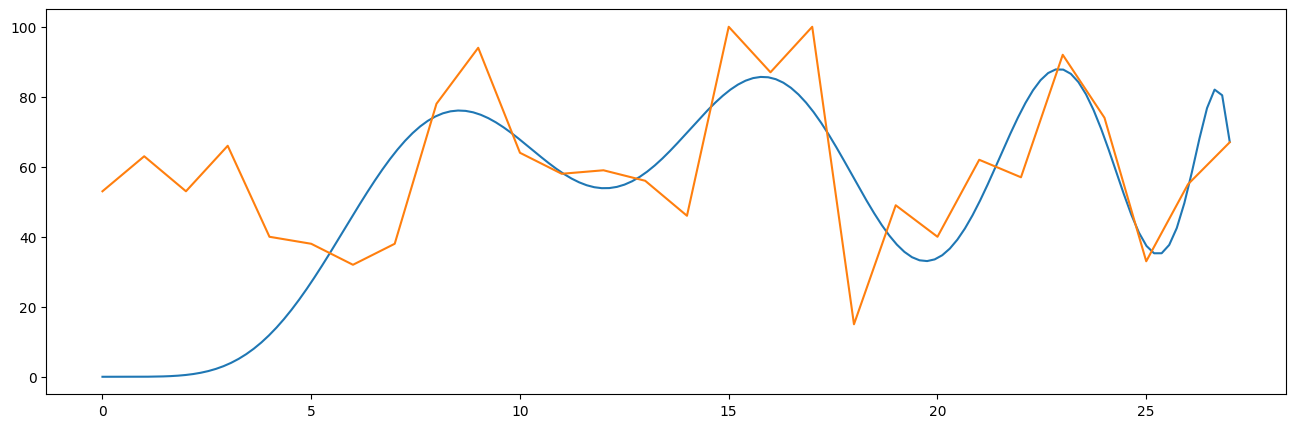

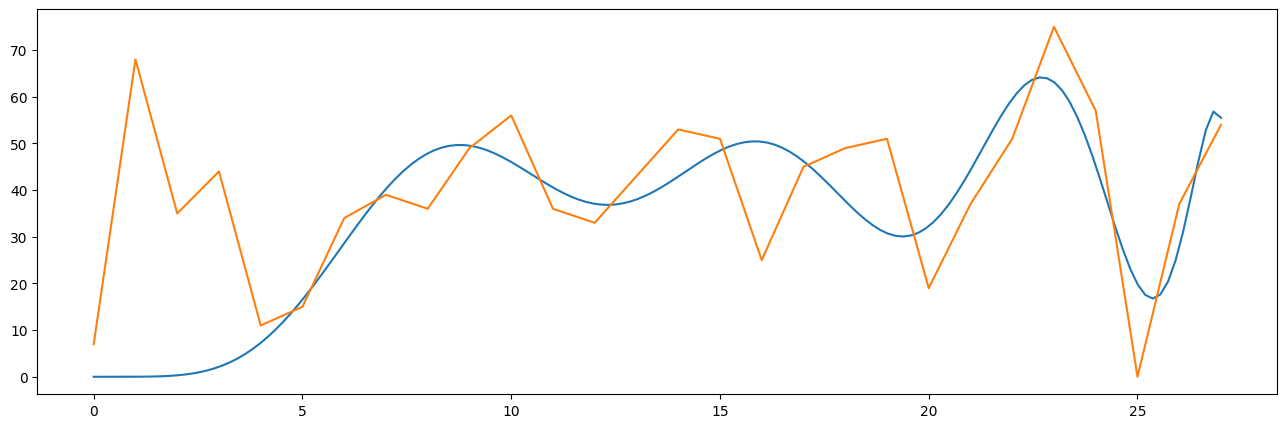

In [139]:
plt.figure(figsize=(16, 5))
plt.plot(plot_x, bbq_y, label="bbq_trend")
plt.plot([i for i in range(28)], df['bbq'], label="bbq")
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(plot_x, kyo_y, label="Kyochon_trend")
plt.plot([i for i in range(28)], df['Kyochon'], label="Kyochon")
plt.show()